# Import Data Set

Q1)Delivery_Time->Predict delivery time using sorting time

In [44]:
import pandas as pd 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf


In [45]:
data = pd.read_csv(r"C:\Users\Shree\Downloads\delivery_time (1).csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [46]:
#Data Structure 
type(data)
data.shape

(21, 2)

In [47]:
#data types
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# Data Type Conversion

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [49]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [50]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [51]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [52]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Outlier detection

# boxplot of Delivery Time

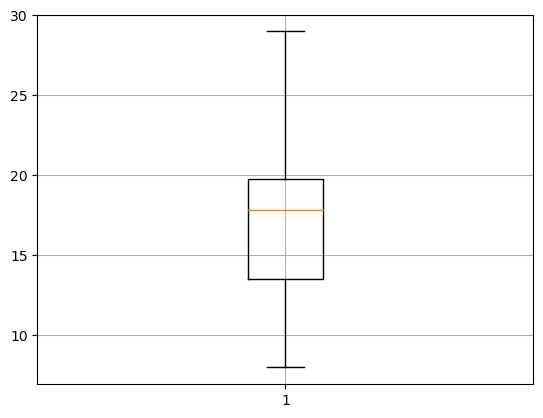

In [53]:
plt.boxplot(data["Delivery Time"])
plt.grid(True)
plt.show()

# boxplot of Sorting Time

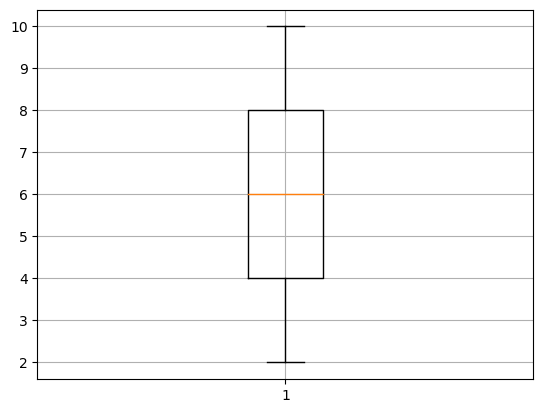

In [55]:
plt.boxplot(data["Sorting Time"])
plt.grid(True)
plt.show()

# distplot  of Delivery Time

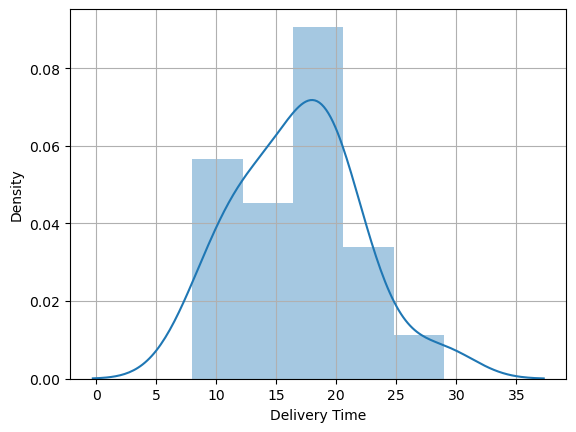

In [56]:
import seaborn as sns
sns.distplot(data["Delivery Time"])
plt.grid(True)
plt.show()

# distplot of Sorting Time

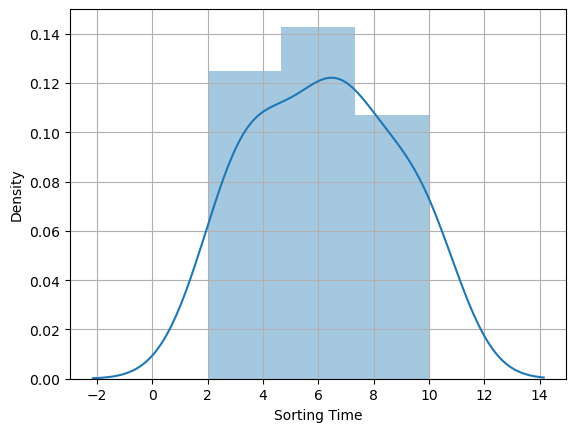

In [59]:
sns.distplot(data['Sorting Time'])
plt.grid(True)
plt.show()

# Scatter plot and Correlation analysis

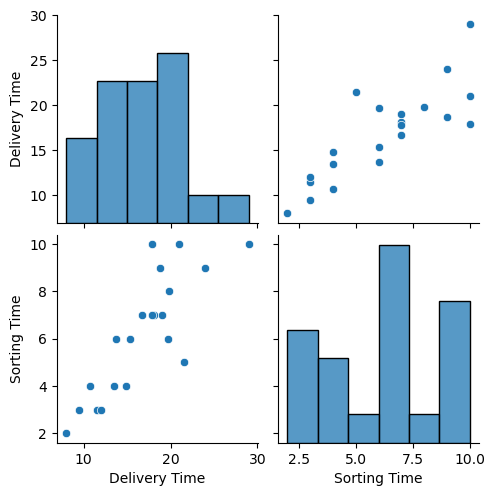

In [18]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)
plt.grid(True)
plt.show()

# Rename the column name

In [60]:
data=data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Fitting a Linear Regression Model

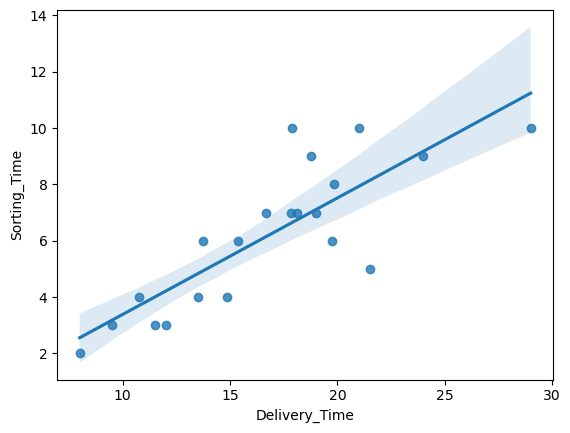

In [61]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

# Model Building

In [63]:
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

In [64]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [65]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [66]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        20:11:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# using log

In [69]:
model1=smf.ols("(Delivery_Time)~np.log(Sorting_Time)",data=data).fit()


In [70]:
model1.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [71]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)    

Intercept               0.472460
np.log(Sorting_Time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(Sorting_Time)    0.000003
dtype: float64


In [72]:
#R squared values
(model1.rsquared,model.rsquared_adj)

(0.6954434611324223, 0.6655489208860244)

In [73]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        20:12:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using Sqrt

In [75]:
model2=smf.ols("(Delivery_Time)~np.square(Sorting_Time)",data=data).fit()


In [76]:
model2.params

Intercept                  11.237205
np.square(Sorting_Time)     0.124870
dtype: float64

In [77]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)    

Intercept                  9.398601
np.square(Sorting_Time)    5.691330
dtype: float64 
 Intercept                  1.415704e-08
np.square(Sorting_Time)    1.739194e-05
dtype: float64


In [78]:
#R squared values
(model2.rsquared,model.rsquared_adj)

(0.6302871815826637, 0.6655489208860244)

In [79]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.74e-05
Time:                        20:12:29   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_Time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using Sqrt

In [81]:
model3=smf.ols("(Delivery_Time)~np.sqrt(Sorting_Time)",data=data).fit()


In [82]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [83]:
#t and p-Values
print(model3.tvalues, '\n', model3.pvalues)    

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64 
 Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64


In [84]:
#R squared values
(model3.rsquared,model.rsquared_adj)

(0.695806227630867, 0.6655489208860244)

In [85]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.61e-06
Time:                        20:12:45   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""